In [23]:
## All the import
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas.plotting import table 
import copy
import dataframe_image as dfi
import seaborn as sns
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords

In [5]:
# Tentative: Insert data
new_pd = pd.read_excel("./Concrete_Data.xls")#("./toy_data.xls")#("./Concrete_Data.xls")
new_pd

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036


In [6]:
# Global Variables

CATEGORICAL = 0
NUMERICAL = 1
DATE = 2

In [7]:
# Helper Functions
# See if the current value is categorical
# https://stackoverflow.com/questions/26924904/check-if-dataframe-column-is-categorical
def is_categorical(df):
    return df.dtype.name == 'category' or df.dtype.name == 'object'

# https://stackoverflow.com/questions/69687640/how-to-iterate-over-columns-using-pandas
# first categorical, numberical, date
def get_type_number(df):
    result = [0, 0, 0]
    for i in range(0, len(df.columns)):
        if(is_categorical(new_pd[df.columns[i]])):
            result[0] = result[0] + 1
        else:
            result[1] = result[1] + 1
            ## [NS]
        if(new_pd[df.columns[i]].dtype.name == 'datetime64[ns]'):
            result[2] = result[2] + 1
    return result

In [8]:
# Initialize rule-based learning recommendation system
all_recommend_dict = {}
# Part 1: Before Additional Part
all_recommend_dict["text_table"] = 1
all_recommend_dict["aligned_bar"] = 0#2
all_recommend_dict["stacked_bar"] = 0#2 # 3 with 3 C
all_recommend_dict["discrete_line"] = 0#4
all_recommend_dict["scatter_plot"] = 0#5
all_recommend_dict["gantt_chart"] = 0#6

all_recommend_array = ["text_table", "aligned_bar", "stacked_bar", "discrete_line", "scatter_plot", "gantt_chart"]



In [9]:
# Rule-based Learning Process
# https://stackoverflow.com/questions/20297332/how-do-i-retrieve-the-number-of-columns-in-a-pandas-data-frame
def rule_based_filtering(df, all_recommend_dict):
    all_recommend_dict = copy.deepcopy(all_recommend_dict)
    all_valid_charts = []
    df_categorical_status = get_type_number(df)
    if(len(df.columns) > 0):
        all_valid_charts.append("text_table")
    if(df_categorical_status[1] >= 1):
        all_valid_charts.append("aligned_bar")
        all_recommend_dict["aligned_bar"] = 2#2
    if(df_categorical_status[0] >= 2 and df_categorical_status[1] >= 1):
        all_valid_charts.append("stacked_bar")
        all_recommend_dict["stacked_bar"] = 2
        if(df_categorical_status[0] >= 3):
            all_recommend_dict["stacked_bar"] = 3
    # https://stackoverflow.com/questions/43214204/how-do-i-tell-if-a-column-in-a-pandas-dataframe-is-of-type-datetime-how-do-i-te
    if(df_categorical_status[2] >= 1 and df_categorical_status[1] >= 1):
        all_valid_charts.append("discrete_line")
        all_recommend_dict["discrete_line"] = 4
    if(df_categorical_status[1] >= 2 and df_categorical_status[1] <= 4):
        all_valid_charts.append("scatter_plot")
        all_recommend_dict["scatter_plot"] = 3
    if(df_categorical_status[1] == 2):
        all_recommend_dict["scatter_plot"] = 5
    
    return all_recommend_dict

        
rule_based_filtering(new_pd, all_recommend_dict)


{'text_table': 1,
 'aligned_bar': 2,
 'stacked_bar': 0,
 'discrete_line': 0,
 'scatter_plot': 0,
 'gantt_chart': 0}

In [15]:
def preprocess_name(string):
    return string.split(" ")[0]

# Single-variable visualization.
# Inspiration: https://d3-graph-gallery.com/index.html
# All valid visualizations listed here.
# average: https://stackoverflow.com/questions/16689514/how-to-get-the-average-of-dataframe-column-values
# https://stackoverflow.com/questions/43725513/pandas-get-average-dataframe/43725615
# https://stackoverflow.com/questions/15360925/how-to-get-the-first-column-of-a-pandas-dataframe-as-a-series

# If categorical, count numbers of occurences for each 
# sns.countplot
# Unique Values
# https://pandas.pydata.org/docs/reference/api/pandas.unique.html
def table_visualization(data, default='AVG', directory='my_visualization.png'):
    return_df = {}
    return_df['Name'] = data.name
    return_df['Total Rows'] = len(data.index)
    if(is_categorical(data)):
        return_df['Count of Unique Values'] = len(pd.unique(data))
        real_return_df = pd.DataFrame(data=[return_df])
        df_styled = real_return_df.style.background_gradient()
        dfi.export(df_styled, directory)
    else:
        # Numerical
        return_df['Average'] = data.mean()
        return_df['Max'] = data.max()
        return_df['Min'] = data.min()
        return_df['standard deviation'] = data.std()
        real_return_df = pd.DataFrame(data=[return_df])
        df_styled = real_return_df.style.background_gradient()
        dfi.export(df_styled, directory)
    return directory
    

def aligned_bar_visualization(df, directory='my_visualization.png'):
    # https://stackabuse.com/matplotlib-bar-plot-tutorial-and-examples/
    # https://stackoverflow.com/questions/31037298/pandas-get-column-average-mean
    if(is_categorical(df)):
        #other logic
        # https://stackoverflow.com/questions/5312778/how-to-test-if-a-dictionary-contains-a-specific-key
        x_dict = {}
        x_result = []
        y_result = []
        all_list = df.values.tolist()
        # https://stackoverflow.com/questions/3294889/iterating-over-dictionaries-using-for-loops
        for i in range(0, len(all_list)):
            if(all_list[i] not in x_dict):
                x_dict[all_list[i]] = 0
            x_dict[all_list[i]] = x_dict[all_list[i]] + 1
        for key, value in x_dict.items():
            x_result.append(key)
            y_result.append(value)
        plt.title("Aligned Bar Visualization for categorical choice")
        # https://stackoverflow.com/questions/40575067/matplotlib-bar-chart-space-out-bars
        plt.bar(x_result, y_result, width = 0.5)
        plt.savefig(directory)
    else:
        magic_num = 5
        max_value = df.max()
        min_value = df.min()
        x_result = []
        for i in range(0, magic_num):
            x_result.append(i)
        y_result = [0] * magic_num
        step = (int)((max_value - min_value) / magic_num + 1)
        for i in range(0, magic_num):
            if(i == magic_num - 1):
                x_result[i] = "["  + str(min_value + step * i) + "," + str(max_value) + "]"
            x_result[i] = "["  + str(min_value + step * i) + "," + str(min_value + step * (i + 1)) + "]"
        all_list = df.values.tolist()
        for i in range(0, len(all_list)):
            y_result[(int)((all_list[i] - min_value) / step)] = y_result[(int)((all_list[i]  - min_value) / step)] + 1
        plt.title("Aligned Bar Visualization for numerical choice")
        # https://stackoverflow.com/questions/40575067/matplotlib-bar-chart-space-out-bars
        plt.bar(x_result, y_result, width = 0.5)
        plt.savefig(directory)
    return directory
    
# SOURCE
# Not suitable for categorical data.
# https://matplotlib.org/3.5.0/gallery/pyplots/boxplot_demo_pyplot.html
# https://stackoverflow.com/questions/45926230/how-to-calculate-1st-and-3rd-quartiles
def box_plot(df, directory='my_visualization.png'):
    fig1, ax1 = plt.subplots()
    ax1.set_title('Box Plot Visualization for numerical choice')
    ax1.boxplot(df)
    fig1.savefig(directory)
    return directory
    
# https://stackoverflow.com/questions/4150171/how-to-create-a-density-plot-in-matplotlib
def density_plot(df, directory='my_visualization.png'):
    sns.set_style('whitegrid')
    plot = sns.kdeplot(df, bw=0.5)
    fig = plot.get_figure()
    fig.savefig(directory) 
    



    

#def stacked_bar_visualization(df, default='AVG', directory='my_visualization.png'):            
        
        

# SOURCE
# https://matplotlib.org/3.5.0/gallery/lines_bars_and_markers/bar_stacked.

# Current Progress: Categorical Done
#def stacked_bar_visualization(df, default='AVG', directory='my_visualization.png'):




## Currently only for 2 data
#def scatter_plot_visualization(df, default='ALL', directory='my_visualization.png'):
   
    
    # if row more than 10: should not use it. Should print and then return error message.
    

'my_visualization.png'

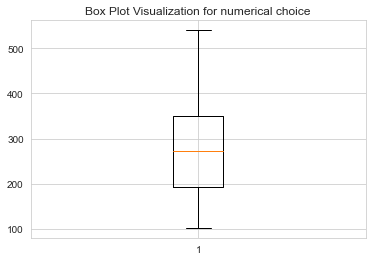

In [16]:
#table_visualization(new_pd.iloc[:,0])
#aligned_bar_visualization(new_pd.iloc[:,0])
#new_pd.iloc[:,0]
box_plot(new_pd.iloc[:,0])
#density_plot(new_pd.iloc[:,0])

In [ ]:
# https://stackoverflow.com/questions/9622163/save-plot-to-image-file-instead-of-displaying-it-using-matplotlibs
fig, ax = plt.subplots( nrows=1, ncols=1 )  # create figure & 1 axis
ax.plot([0,1,2], [10,20,3])
fig.savefig('./1.png')   # save the figure to file
plt.close(fig)    # close the figure window


In [56]:
# https://amueller.github.io/word_cloud/auto_examples/simple.html#sphx-glr-auto-examples-simple-py
# For unstuctured data
text = open('./hamlet.txt').read()
#print(text)
# Generate a word cloud image

def generate_wordcloud(text, directory="my_visualization.png"):
    wordcloud = WordCloud().generate(text)
    
    # Display the generated image:
    # the matplotlib way:
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    
    
    # lower max_font_size
    wordcloud = WordCloud(max_font_size=40).generate(text)
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()


    #https://stackoverflow.com/questions/5486337/how-to-remove-stop-words-using-nltk-or-python
    processed_texts = nltk.word_tokenize(text)
    filtered_words = [word for word in processed_texts if word not in stopwords.words('english')]
    filtered_word = ""
    for i in range(0, len(filtered_words)):
        filtered_word = filtered_word + " " + filtered_words[i] + " "
    wordcloud = WordCloud().generate(filtered_word)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.savefig(directory)
    #plt.axis("off")
    
    return directory

# https://stackoverflow.com/questions/28392860/print-10-most-frequently-occurring-words-of-a-text-that-including-and-excluding
def present_top_words(text, directory="my_visualization.png", top_count=10):
    processed_texts = nltk.word_tokenize(text)
    filtered_words = [word for word in processed_texts if word not in stopwords.words('english') and len(word) > 2]
    allWordDist = nltk.FreqDist(w.lower() for w in filtered_words)
    most_common = []
    most_common_counts = []#allWordDist.most_common(top_count)[0:top_count]
    for i in range(0, min(top_count, len(allWordDist))):
        most_common.append(allWordDist.most_common(top_count)[i][0])
        most_common_counts.append(allWordDist.most_common(top_count)[i][1])
    plt.bar(most_common, most_common_counts, width = 0.5)
    plt.savefig(directory)
    

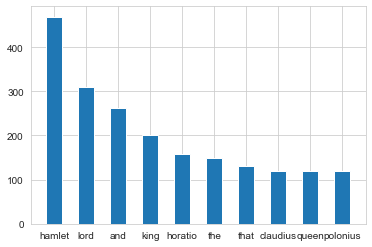

In [57]:
#generate_wordcloud(text)
present_top_words(text)